In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
california = fetch_california_housing()
X, y = california.data, california.target

In [ ]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
fetch_california_housing(as_frame=True)['data']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude'],
      dtype='object')

NameError: ignored

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X_scaled, columns=fetch_california_housing(as_frame=TRUE)['data'].columns)

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(mse)
print(r2)

0.555891598695244
0.5757877060324511


In [ ]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
scores = []
for model in models:
  cv_scores = cross_val_score(model, X_scaled, y, cv=5)
  scores.append((model.__class__.__name__, cv_scores.mean()))
best_model = max(scores, key=lambda x: x[1])[0]

In [ ]:
max(scores, key=lambda x: x[1])[0]

'RandomForestRegressor'

In [ ]:
best_model

'RandomForestRegressor'

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor())
]

In [ ]:
mean_scores = []
for name, model in models:
  scores = cross_val_score(model, X, y, cv=5)
  mean_scores.append((name, np.mean(scores)))


In [ ]:
mean_scores.sort(key=lambda x:x[1], reverse=True)
names, scores = zip(*mean_scores)

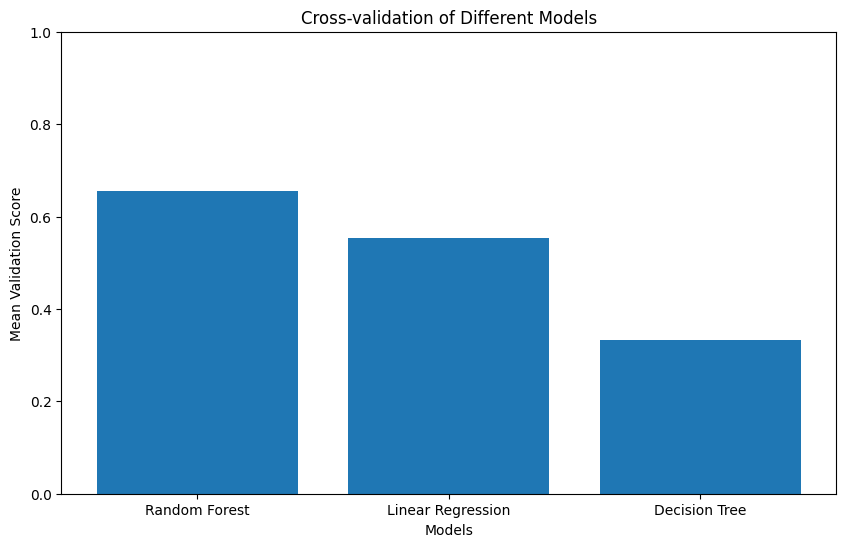

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(names, scores)
plt.xlabel('Models')
plt.ylabel('Mean Validation Score')
plt.title('Cross-validation of Different Models')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

In [ ]:
mean_scores

[('Random Forest', 0.6547403493121225),
 ('Linear Regression', 0.5530311140279229),
 ('Decision Tree', 0.3322522267210331)]

In [ ]:
linear_params = {'fit_intercept': [True, False]}
linear_grid = GridSearchCV(LinearRegression(), linear_params, cv=5)
linear_grid.fit(X, y)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [ ]:
tree_params = {'max_depth': [None, 5, 10, 15]}
tree_grid = GridSearchCV(DecisionTreeRegressor(), tree_params, cv=5)
tree_grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15]})

In [ ]:
forest_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
forest_grid = GridSearchCV(RandomForestRegressor(), forest_params, cv=5)
forest_grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 200]})

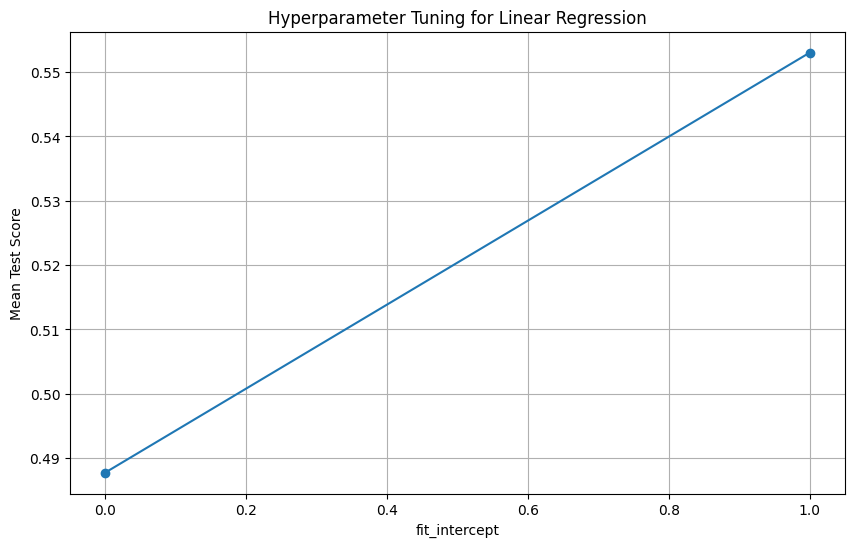

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(linear_params['fit_intercept'], linear_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel('fit_intercept')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameter Tuning for Linear Regression')
plt.grid(True)
plt.show()

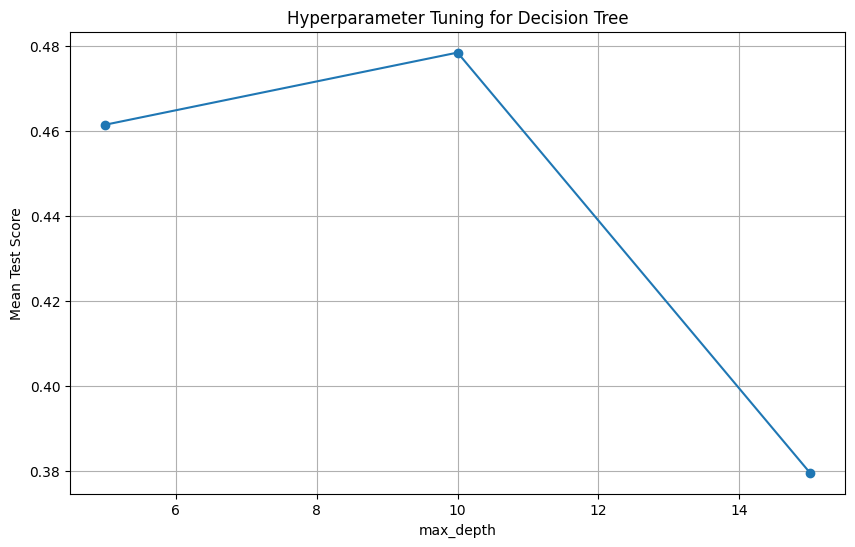

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(tree_params['max_depth'], tree_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameter Tuning for Decision Tree')
plt.grid(True)
plt.show()

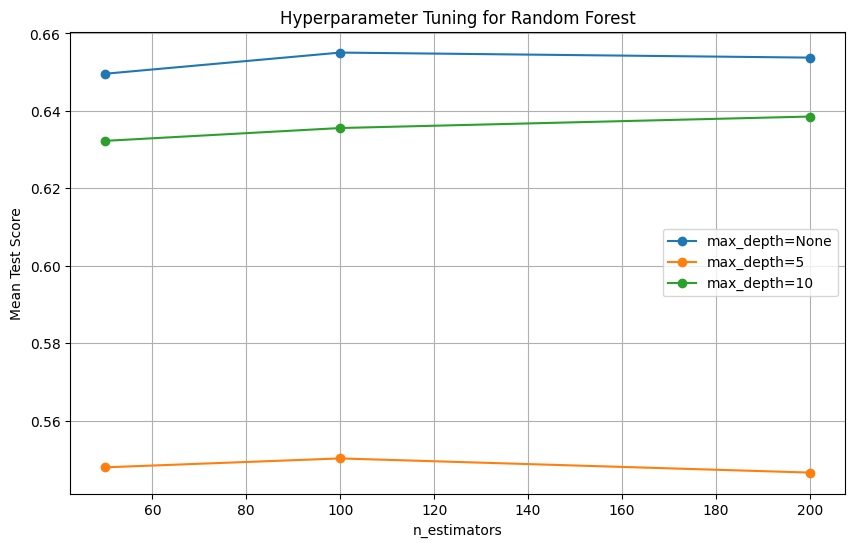

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(forest_params['n_estimators'], forest_grid.cv_results_['mean_test_score'][:3], marker='o', label='max_depth=None')
plt.plot(forest_params['n_estimators'], forest_grid.cv_results_['mean_test_score'][3:6], marker='o', label='max_depth=5')
plt.plot(forest_params['n_estimators'], forest_grid.cv_results_['mean_test_score'][6:], marker='o', label='max_depth=10')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameter Tuning for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_model = None
best_score = -float('inf')
best_params = None

In [ ]:
if linear_grid.best_score_ > best_score:
    best_model = linear_grid.best_estimator_
    best_score = linear_grid.best_score_
    best_params = linear_grid.best_params_

In [ ]:
if tree_grid.best_score_ > best_score:
    best_model = tree_grid.best_estimator_
    best_score = tree_grid.best_score_
    best_params = tree_grid.best_params_

In [ ]:
if forest_grid.best_score_ > best_score:
    best_model = forest_grid.best_estimator_
    best_score = forest_grid.best_score_
    best_params = forest_grid.best_params_

In [ ]:
best_model_info = {'model': best_model, 'params': best_params}

In [ ]:
print("Best Model:", best_model_info['model'])
print("Best Parameters:", best_model_info['params'])

Best Model: RandomForestRegressor()
Best Parameters: {'max_depth': None, 'n_estimators': 100}


In [ ]:
best_model = best_model_info['model']
best_params = best_model_info['params']
best_model.set_params(**best_params)

RandomForestRegressor()

In [ ]:
num_samples = 100
num_features = X_scaled.shape[1]

In [ ]:
np.random.seed(42)
new_data = np.random.randn(num_samples, num_features)

In [ ]:
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

In [ ]:
print(new_data_scaled[:10])

[[ 0.71126062 -0.31932361  0.51945942  1.47409072 -0.1770501  -0.06138677
   1.54320154  0.77893686]
 [-0.50156235  0.40361027 -0.58383703 -0.54684438  0.30102084 -1.79484904
  -1.48311797 -0.54561765]
 [-1.18361921  0.16117623 -1.02531835 -1.50873264  1.52973275 -0.05275565
   0.1586193  -1.4047265 ]
 [-0.59559218 -0.05472431 -1.26658007  0.30819657 -0.54504049 -0.12080548
  -0.45434629  1.85956425]
 [ 0.07080997 -1.29563875  0.69308676 -1.31417502  0.26778624 -1.8427396
  -1.11974338  0.21058081]
 [ 1.01472405  0.00946    -0.23851203 -0.37955489 -1.42652907 -0.56280628
  -0.32513943  1.06749853]
 [ 0.51908469 -2.04459316  0.19812942 -0.46489214 -0.62163708  0.81178788
   1.04108199  0.94214549]
 [-0.96568808 -0.50084496  0.20525841  0.91774841 -0.42307721 -0.01134057
  -0.91654553 -1.17707312]
 [ 1.10768805  1.26761702 -0.1951806   0.94618899  0.42118607 -0.48566454
   0.42777834  1.54654388]
 [ 0.04278138  1.48891058 -2.72500799  0.76162005  0.14546944 -0.12835567
   0.18081439 -1.9

In [ ]:
future_predictions = best_model.predict(new_data_scaled)

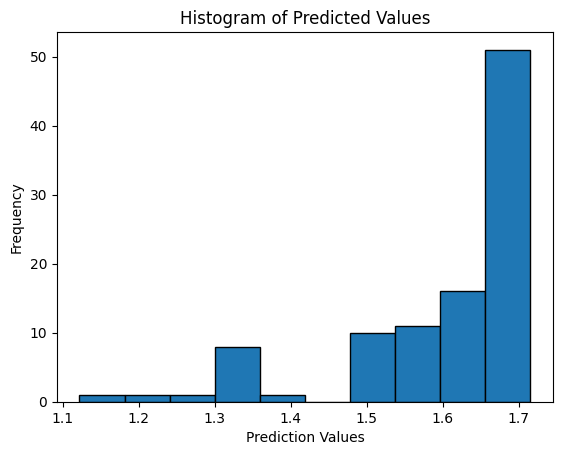

In [ ]:
plt.hist(future_predictions, bins=10, edgecolor='black')
plt.xlabel('Prediction Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.show()

In [ ]:
X = 46